In [852]:
import pandas as pd
from pandasql import sqldf

In [853]:
# A function to run a SQL Query 
pysqldf = lambda q: sqldf(q, globals())

In [854]:
# Importing Data
nvida = pd.read_csv("NVIDA DATA.csv")
spy = pd.read_csv("SPY DATA.csv")
spy

,Date,Close,Volume,Open,High,Low
0,11/26/2024,600.65,45621290,598.80,601.3300,598.0700
1,11/25/2024,597.53,42441390,599.52,600.8600,595.2000
2,11/22/2024,595.51,38226390,593.66,596.1500,593.1525
3,11/21/2024,593.67,46750290,593.40,595.1200,587.4500
4,11/20/2024,590.50,50032580,590.38,590.7900,584.6300
...,...,...,...,...,...,...
248,12/1/2023,459.10,89183400,455.77,459.6500,455.1600
249,11/30/2023,456.40,79752700,455.48,456.7600,453.3400
250,11/29/2023,454.61,63145990,457.15,458.3200,454.2000
251,11/28/2023,454.93,62115010,454.08,456.2700,453.5000


### Creating charts of closing price over the past year

In [856]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

In [857]:
#Reverse the orders so the dates go in order
nvida = nvida.reindex(index=nvida.index[::-1])
spy = spy.reindex(index=spy.index[::-1])

In [858]:
#Will use this to remove the cash symbol from the data
def removeCashSymbol(input):
    return float(input[1:])

#df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [859]:
from datetime import datetime


def convertDate(input):
    x = datetime.strptime(input,'%m/%d/%Y').date()
    return x

convertDate("07/29/2005")

datetime.date(2005, 7, 29)

In [860]:
#Cleaning data
nvida['Day'] = range(1, len(nvida) + 1)
spy['Day'] = range(1, len(spy) + 1)
nvida['Close'] = nvida['Close'].apply(removeCashSymbol)
nvida['Date'] = nvida['Date'].apply(convertDate)
spy['Date'] = spy['Date'].apply(convertDate)

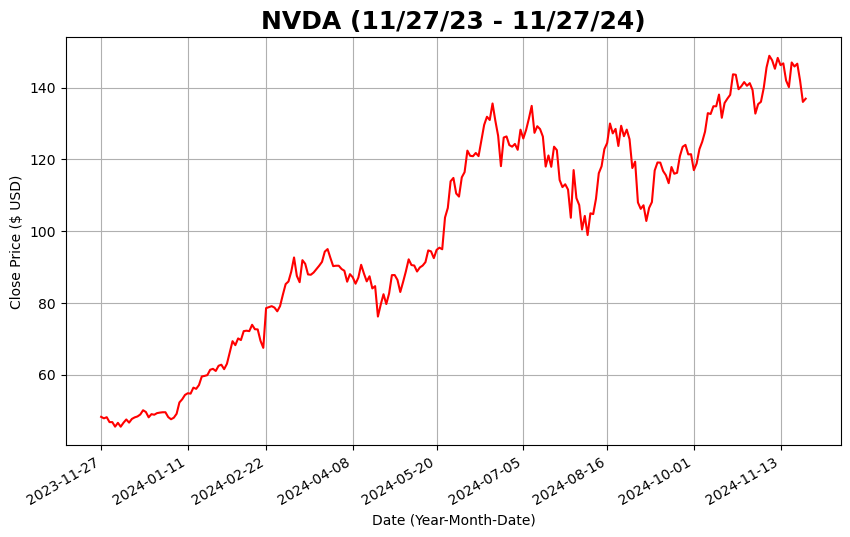

In [861]:
#Selecting data
import matplotlib.dates as mdates


q = """SELECT CAST(Close AS FLOAT) AS Close, Date 
       FROM nvida"""

p = """SELECT CAST(Close AS FLOAT) AS Close, Date 
       FROM spy"""

nvidaClose = pysqldf(q)

# Plot setup
plt.figure(figsize=(10, 6))


# Set x-axis date formatting and tick intervals
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Year-Month-Day format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for each month

# Plot the data
plt.plot(nvidaClose.Date, nvidaClose.Close, 'r')  # Plot data with a label

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add title and labels
#plt.xticks(nvidaClose.Date[::20])
plt.title("NVDA (11/27/23 - 11/27/24)", fontdict = {'fontweight' : 'bold', 'fontsize' : 18})
plt.xlabel("Date (Year-Month-Date)")
plt.ylabel("Close Price ($ USD)")
plt.grid()

# Show the plot
plt.show()

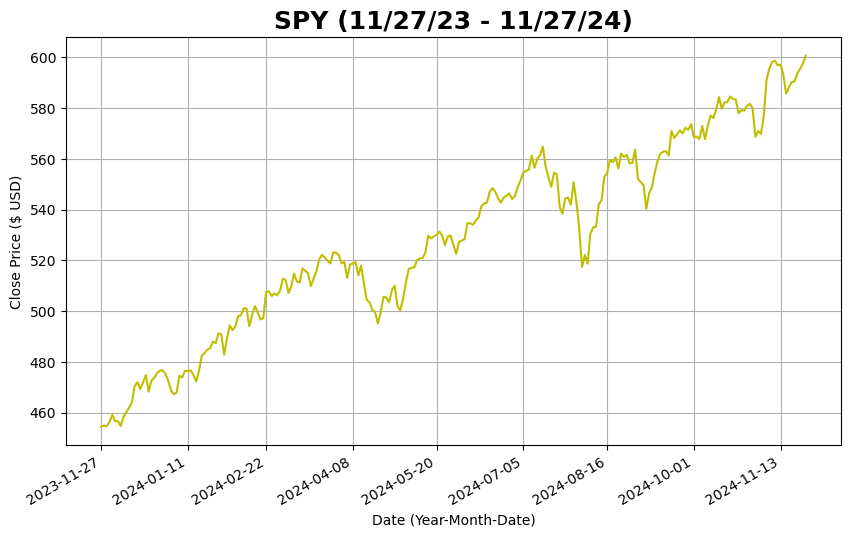

In [862]:
#Selecting data
import matplotlib.dates as mdates


q = """SELECT CAST(Close AS FLOAT) AS Close, Date 
       FROM nvida"""

p = """SELECT CAST(Close AS FLOAT) AS Close, Date 
       FROM spy"""

spyClose = pysqldf(p)

# Plot setup
plt.figure(figsize=(10, 6))


# Set x-axis date formatting and tick intervals
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Year-Month-Day format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for each month

# Plot the data
plt.plot(spyClose.Date, spyClose.Close, 'y')  # Plot data with a label

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add title and labels
#plt.xticks(nvidaClose.Date[::20])
plt.title("SPY (11/27/23 - 11/27/24)", fontdict = {'fontweight' : 'bold', 'fontsize' : 18})
plt.xlabel("Date (Year-Month-Date)")
plt.ylabel("Close Price ($ USD)")
plt.grid()


# Show the plot
plt.show()

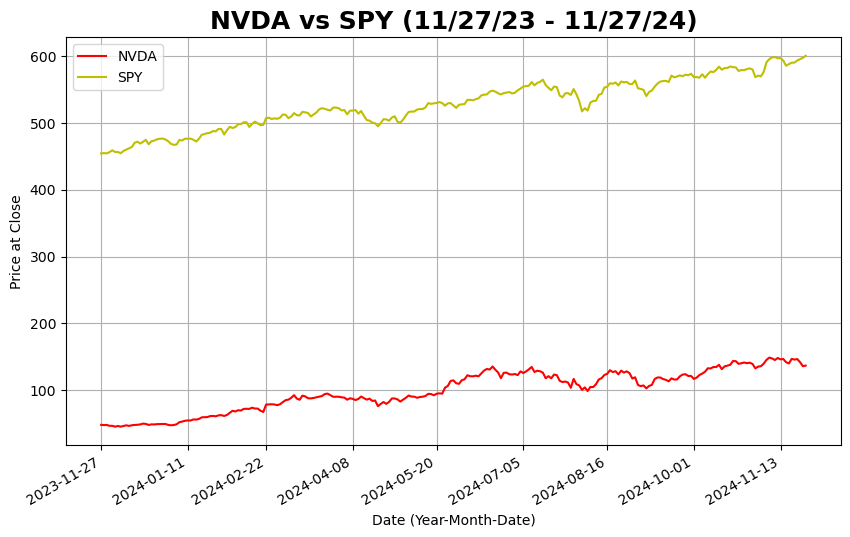

In [863]:
#Plots both graphs

# Plot setup
plt.figure(figsize=(10, 6))


# Set x-axis date formatting and tick intervals
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Year-Month-Day format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for each month

# Plot the data
plt.plot(spyClose.Date, nvidaClose.Close, 'r')  
plt.plot(spyClose.Date, spyClose.Close, 'y')  

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add title and labels
#plt.xticks(nvidaClose.Date[::20])
plt.title("NVDA vs SPY (11/27/23 - 11/27/24)", fontdict = {'fontweight' : 'bold', 'fontsize' : 18})
plt.xlabel("Date (Year-Month-Date)")
plt.ylabel("Price at Close")
plt.grid()
plt.legend(['NVDA','SPY'])


### Now lets compare these two charts using percent change

In [865]:
#Convert to percent change
def convertToPC(intialVal, val):
    return round(((val - intialVal)/float(intialVal)) * 100, 3)

In [866]:
#Converts close prices to close percent change from intial price
nvidaClose['Close'] = nvidaClose['Close'].apply(lambda x: convertToPC(48.24,x))
spyClose['Close'] = spyClose['Close'].apply(lambda x: convertToPC(454.48,x))
spyClose

,Close,Date
0,0.000,2023-11-27
1,0.099,2023-11-28
2,0.029,2023-11-29
3,0.422,2023-11-30
4,1.017,2023-12-01
...,...,...
248,29.929,2024-11-20
249,30.626,2024-11-21
250,31.031,2024-11-22
251,31.476,2024-11-25


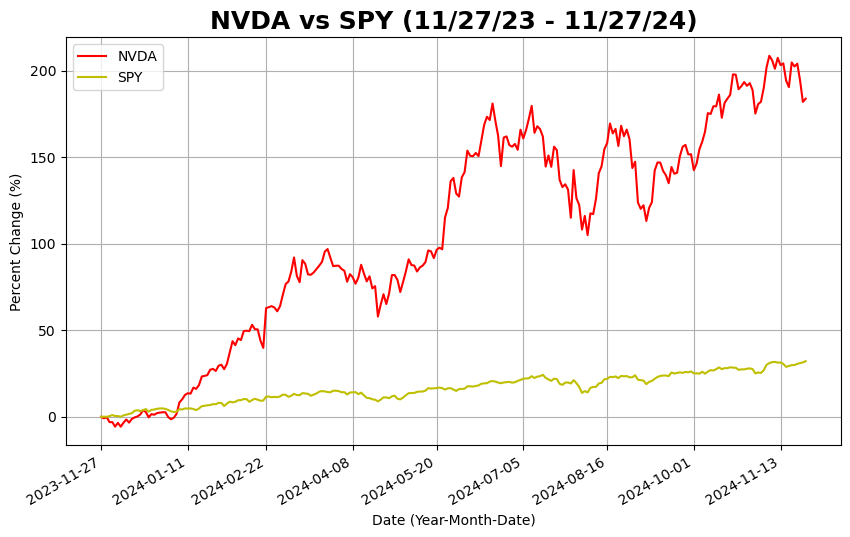

In [867]:
#Plots both graphs

# Plot setup
plt.figure(figsize=(10, 6))


# Set x-axis date formatting and tick intervals
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Year-Month-Day format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for each month

# Plot the data
plt.plot(spyClose.Date, nvidaClose.Close, 'r')  
plt.plot(spyClose.Date, spyClose.Close, 'y')  

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add title and labels
#plt.xticks(nvidaClose.Date[::20])
plt.title("NVDA vs SPY (11/27/23 - 11/27/24)", fontdict = {'fontweight' : 'bold', 'fontsize' : 18})
plt.xlabel("Date (Year-Month-Date)")
plt.ylabel("Percent Change (%)")
plt.grid()
plt.legend(['NVDA','SPY'])


### Interesting Now lets compare Volume

In [869]:
def volumeFilter(num):
    return round(num/1000000000,3) 

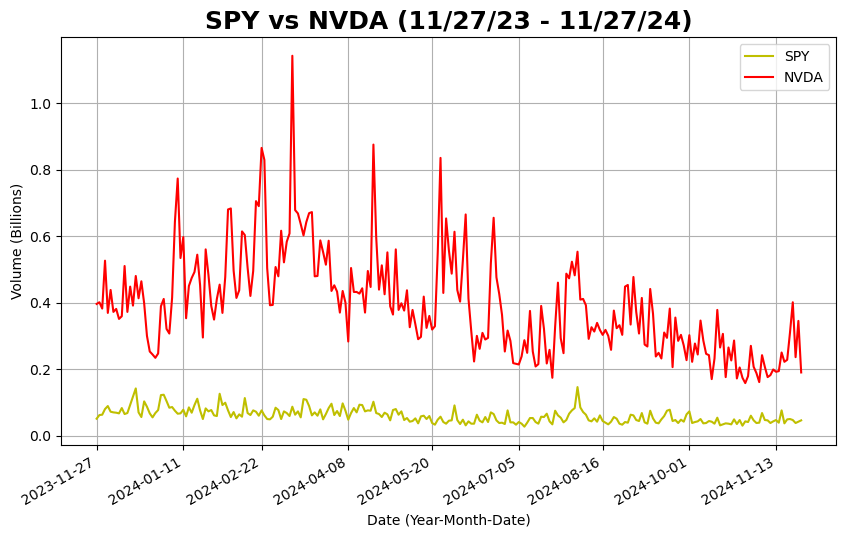

In [870]:
#Selecting data
import matplotlib.dates as mdates


q = """SELECT Volume, Date 
       FROM nvida"""

p = """SELECT Volume, Date 
       FROM spy"""

spyVol = pysqldf(p)
nvidaVol = pysqldf(q)

spyVol['Volume'] = spyVol['Volume'].apply(volumeFilter)
nvidaVol['Volume'] = nvidaVol['Volume'].apply(volumeFilter)

# Plot setup
plt.figure(figsize=(10, 6))

# Major ticks for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 

# Plot the data
plt.plot(spyVol.Date, spyVol.Volume, 'y')  # Plot data with a label
plt.plot(spyVol.Date, nvidaVol.Volume, 'r')
# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add title and labels
#plt.xticks(nvidaClose.Date[::20])
plt.title("SPY vs NVDA (11/27/23 - 11/27/24)", fontdict = {'fontweight' : 'bold', 'fontsize' : 18})
plt.xlabel("Date (Year-Month-Date)")
plt.ylabel("Volume (Billions)")
plt.legend(['SPY', 'NVDA'])
plt.grid()


# Show the plot
plt.show()

### Using machine learning given the price of NVDA could we estimate the price of SPY

In [872]:
# Cleans up data and adds a change in price col
nvida['Open'] = nvida['Open'].apply(removeCashSymbol)
nvida['High'] = nvida['High'].apply(removeCashSymbol)
nvida['Low'] = nvida['Low'].apply(removeCashSymbol)

#Price Change
nvida['Price_Change'] = nvida['Close'] - nvida['Open']
spy['Price_Change'] = spy['Close'] - spy['Open']

#High Low Range
nvida['High_Low_Range'] = nvida['High'] - nvida['Low']
spy['High_Low_Range'] = spy['High'] - spy['Low']


In [873]:
nvida

,Date,Close,Volume,Open,High,Low,Day,Price_Change,High_Low_Range
252,2023-11-27,48.24,395661900,47.80,48.53,47.65,1,0.44,0.88
251,2023-11-28,47.82,401490900,48.24,48.32,47.47,2,-0.42,0.85
250,2023-11-29,48.14,382004700,48.38,48.76,47.86,3,-0.24,0.90
249,2023-11-30,46.77,526246600,48.02,48.11,46.42,4,-1.25,1.69
248,2023-12-01,46.77,369317000,46.53,47.20,46.19,5,0.24,1.01
...,...,...,...,...,...,...,...,...,...
4,2024-11-20,145.89,309871700,147.41,147.56,142.73,249,-1.52,4.83
3,2024-11-21,146.67,400946600,149.35,152.89,140.70,250,-2.68,12.19
2,2024-11-22,141.95,236406200,145.93,147.16,141.10,251,-3.98,6.06
1,2024-11-25,136.02,344941900,141.99,142.05,135.82,252,-5.97,6.23


In [874]:
spy

,Date,Close,Volume,Open,High,Low,Day,Price_Change,High_Low_Range
252,2023-11-27,454.48,50505990,454.65,455.4901,454.0799,1,-0.17,1.4102
251,2023-11-28,454.93,62115010,454.08,456.2700,453.5000,2,0.85,2.7700
250,2023-11-29,454.61,63145990,457.15,458.3200,454.2000,3,-2.54,4.1200
249,2023-11-30,456.40,79752700,455.48,456.7600,453.3400,4,0.92,3.4200
248,2023-12-01,459.10,89183400,455.77,459.6500,455.1600,5,3.33,4.4900
...,...,...,...,...,...,...,...,...,...
4,2024-11-20,590.50,50032580,590.38,590.7900,584.6300,249,0.12,6.1600
3,2024-11-21,593.67,46750290,593.40,595.1200,587.4500,250,0.27,7.6700
2,2024-11-22,595.51,38226390,593.66,596.1500,593.1525,251,1.85,2.9975
1,2024-11-25,597.53,42441390,599.52,600.8600,595.2000,252,-1.99,5.6600


In [875]:
merged_data = pd.merge(nvida, spy, left_index=True, right_index=True, suffixes=('_NVDA', '_SPY'))
merged_data

,Date_NVDA,Close_NVDA,Volume_NVDA,Open_NVDA,High_NVDA,Low_NVDA,Day_NVDA,Price_Change_NVDA,High_Low_Range_NVDA,Date_SPY,Close_SPY,Volume_SPY,Open_SPY,High_SPY,Low_SPY,Day_SPY,Price_Change_SPY,High_Low_Range_SPY
252,2023-11-27,48.24,395661900,47.80,48.53,47.65,1,0.44,0.88,2023-11-27,454.48,50505990,454.65,455.4901,454.0799,1,-0.17,1.4102
251,2023-11-28,47.82,401490900,48.24,48.32,47.47,2,-0.42,0.85,2023-11-28,454.93,62115010,454.08,456.2700,453.5000,2,0.85,2.7700
250,2023-11-29,48.14,382004700,48.38,48.76,47.86,3,-0.24,0.90,2023-11-29,454.61,63145990,457.15,458.3200,454.2000,3,-2.54,4.1200
249,2023-11-30,46.77,526246600,48.02,48.11,46.42,4,-1.25,1.69,2023-11-30,456.40,79752700,455.48,456.7600,453.3400,4,0.92,3.4200
248,2023-12-01,46.77,369317000,46.53,47.20,46.19,5,0.24,1.01,2023-12-01,459.10,89183400,455.77,459.6500,455.1600,5,3.33,4.4900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-11-20,145.89,309871700,147.41,147.56,142.73,249,-1.52,4.83,2024-11-20,590.50,50032580,590.38,590.7900,584.6300,249,0.12,6.1600
3,2024-11-21,146.67,400946600,149.35,152.89,140.70,250,-2.68,12.19,2024-11-21,593.67,46750290,593.40,595.1200,587.4500,250,0.27,7.6700
2,2024-11-22,141.95,236406200,145.93,147.16,141.10,251,-3.98,6.06,2024-11-22,595.51,38226390,593.66,596.1500,593.1525,251,1.85,2.9975
1,2024-11-25,136.02,344941900,141.99,142.05,135.82,252,-5.97,6.23,2024-11-25,597.53,42441390,599.52,600.8600,595.2000,252,-1.99,5.6600


In [876]:
mergedDataClean = merged_data[['Date_NVDA',	'Close_NVDA', 'Volume_NVDA','Open_NVDA','High_NVDA','Low_NVDA', 'Day_NVDA', 'Price_Change_NVDA', 'High_Low_Range_NVDA', 'Close_SPY']]
mergedDataClean

,Date_NVDA,Close_NVDA,Volume_NVDA,Open_NVDA,High_NVDA,Low_NVDA,Day_NVDA,Price_Change_NVDA,High_Low_Range_NVDA,Close_SPY
252,2023-11-27,48.24,395661900,47.80,48.53,47.65,1,0.44,0.88,454.48
251,2023-11-28,47.82,401490900,48.24,48.32,47.47,2,-0.42,0.85,454.93
250,2023-11-29,48.14,382004700,48.38,48.76,47.86,3,-0.24,0.90,454.61
249,2023-11-30,46.77,526246600,48.02,48.11,46.42,4,-1.25,1.69,456.40
248,2023-12-01,46.77,369317000,46.53,47.20,46.19,5,0.24,1.01,459.10
...,...,...,...,...,...,...,...,...,...,...
4,2024-11-20,145.89,309871700,147.41,147.56,142.73,249,-1.52,4.83,590.50
3,2024-11-21,146.67,400946600,149.35,152.89,140.70,250,-2.68,12.19,593.67
2,2024-11-22,141.95,236406200,145.93,147.16,141.10,251,-3.98,6.06,595.51
1,2024-11-25,136.02,344941900,141.99,142.05,135.82,252,-5.97,6.23,597.53


In [877]:
#Splits into attributes and prediction
X = mergedDataClean[['Close_NVDA', 'Volume_NVDA','Open_NVDA','High_NVDA','Low_NVDA', 'Day_NVDA', 'Price_Change_NVDA', 'High_Low_Range_NVDA']]
y = mergedDataClean['Close_SPY']

In [878]:
#Splitting the data for training
from sklearn.model_selection import train_test_split

#saves 20% of the data for testing, trains on the rest.
train_size = int(0.8 * len(merged_data))  # 80% for training

#Splits into testing and training groups.
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [879]:
from sklearn.preprocessing import StandardScaler

# First, before anything we must normalize the results

# Initialize the scaler from sklearn
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [880]:
#Lets start with a random forest Regression
#Import the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn import svm

#Initialize the model
model = ElasticNet(random_state=50)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

ElasticNet(random_state=50)

In [881]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

#Predicted
y_pred

array([546.61879527, 545.08839204, 546.91464569, 545.80484536,
       546.06904841, 548.68919449, 551.43439278, 553.74167414,
       551.45461254, 549.6753183 , 549.84676939, 548.35992416,
       551.60241805, 553.14292184, 555.72046898, 558.97325649,
       560.17121285, 560.65041583, 561.54538896, 564.00139801,
       562.70285578, 562.20903625, 564.7300542 , 564.56846772,
       567.63054687, 568.59121361, 566.94190145, 566.9385361 ,
       568.21914884, 568.22835083, 567.79807127, 566.54344083,
       563.69498876, 563.69298244, 565.17586488, 566.74006767,
       571.02654639, 573.26110107, 574.10504139, 573.55337357,
       573.93596454, 573.90019735, 573.71410125, 570.85247545,
       568.30270409, 572.43570747, 572.88650857, 575.98961195,
       572.43572522, 568.12683523, 567.12572048])

In [882]:
y_test

50    563.07
49    561.40
48    570.98
47    568.25
46    569.67
45    571.30
44    570.04
43    572.30
42    571.47
41    573.76
40    568.62
39    568.86
38    567.82
37    572.98
36    567.80
35    573.17
34    577.14
33    576.13
32    579.58
31    584.32
30    579.78
29    582.30
28    582.35
27    584.59
26    583.63
25    583.32
24    577.99
23    579.24
22    579.04
21    580.83
20    581.77
19    580.01
18    568.64
17    571.04
16    569.81
15    576.70
14    591.04
13    595.61
12    598.19
11    598.76
10    596.90
9     597.19
8     593.35
7     585.75
6     588.15
5     590.30
4     590.50
3     593.67
2     595.51
1     597.53
0     600.65
Name: Close_SPY, dtype: float64

In [883]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 3.09%


### Now lets release the graphs 

In [885]:
#We're gonna compare our predictions of SPY to the actual value
spy

,Date,Close,Volume,Open,High,Low,Day,Price_Change,High_Low_Range
252,2023-11-27,454.48,50505990,454.65,455.4901,454.0799,1,-0.17,1.4102
251,2023-11-28,454.93,62115010,454.08,456.2700,453.5000,2,0.85,2.7700
250,2023-11-29,454.61,63145990,457.15,458.3200,454.2000,3,-2.54,4.1200
249,2023-11-30,456.40,79752700,455.48,456.7600,453.3400,4,0.92,3.4200
248,2023-12-01,459.10,89183400,455.77,459.6500,455.1600,5,3.33,4.4900
...,...,...,...,...,...,...,...,...,...
4,2024-11-20,590.50,50032580,590.38,590.7900,584.6300,249,0.12,6.1600
3,2024-11-21,593.67,46750290,593.40,595.1200,587.4500,250,0.27,7.6700
2,2024-11-22,595.51,38226390,593.66,596.1500,593.1525,251,1.85,2.9975
1,2024-11-25,597.53,42441390,599.52,600.8600,595.2000,252,-1.99,5.6600


In [886]:
newSpy = spy.iloc[202:253].copy()
newSpy['Pred_Close'] = y_pred
newSpy

,Date,Close,Volume,Open,High,Low,Day,Price_Change,High_Low_Range,Pred_Close
50,2024-09-17,563.07,49320970,565.10,566.5800,560.7950,203,-2.03,5.7850,546.618795
49,2024-09-18,561.40,59044940,563.74,568.6900,560.8300,204,-2.34,7.8600,545.088392
48,2024-09-19,570.98,75315470,571.01,572.8800,568.0800,205,-0.03,4.8000,546.914646
47,2024-09-20,568.25,77503110,567.84,569.3100,565.1700,206,0.41,4.1400,545.804845
46,2024-09-23,569.67,44116920,569.34,570.3325,568.1000,207,0.33,2.2325,546.069048
45,2024-09-24,571.30,46805670,570.48,571.3600,567.6000,208,0.82,3.7600,548.689194
44,2024-09-25,570.04,38428590,571.14,571.8900,568.9100,209,-1.10,2.9800,551.434393
43,2024-09-26,572.30,48336000,574.38,574.7100,569.9000,210,-2.08,4.8100,553.741674
42,2024-09-27,571.47,42100930,573.39,574.2200,570.4200,211,-1.92,3.8000,551.454613
41,2024-09-30,573.76,63655450,570.42,574.3800,568.0800,212,3.34,6.3000,549.675318


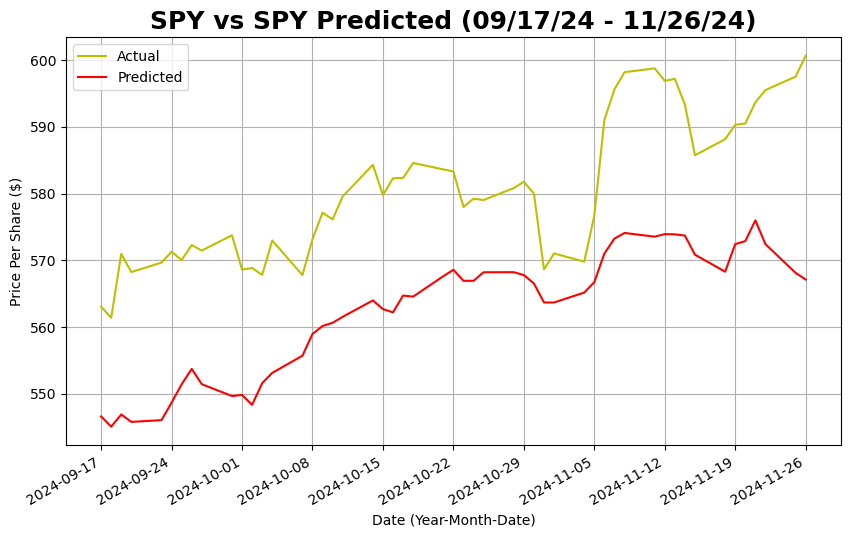

In [887]:
# Plot setup
plt.figure(figsize=(10, 6))

# Major ticks for each month
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 

# Plot the data
plt.plot(newSpy.Date, newSpy.Close, 'y')  # Plot data with a label
plt.plot(newSpy.Date, newSpy.Pred_Close, 'r')
# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add title and labels
plt.xticks(newSpy.Date[::5])
plt.title("SPY vs SPY Predicted (09/17/24 - 11/26/24)", fontdict = {'fontweight' : 'bold', 'fontsize' : 18})
plt.xlabel("Date (Year-Month-Date)")
plt.ylabel("Price Per Share ($)")
plt.grid()
plt.legend(['Actual','Predicted'])

# Show the plot
plt.show()

# Now lets try with percent change

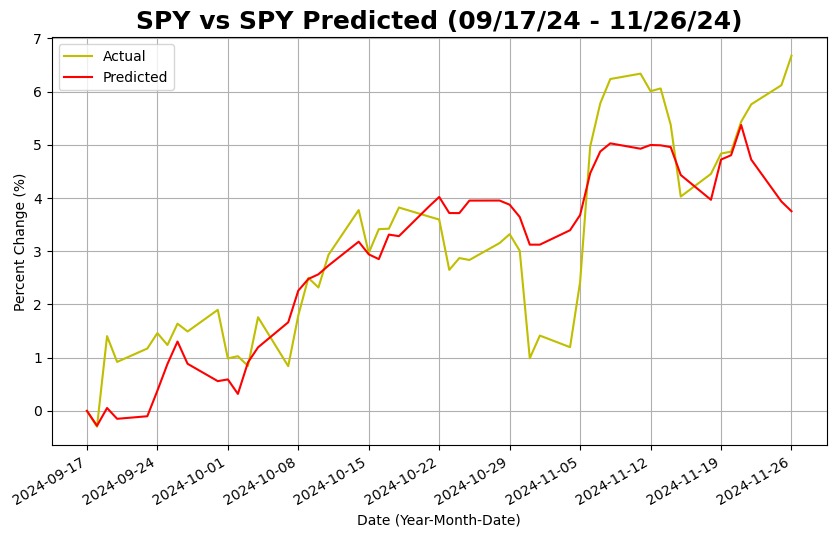

,Date,Close,Volume,Open,High,Low,Day,Price_Change,High_Low_Range,Pred_Close
50,2024-09-17,0.000,49320970,565.10,566.5800,560.7950,203,-2.03,5.7850,0.000
49,2024-09-18,-0.297,59044940,563.74,568.6900,560.8300,204,-2.34,7.8600,-0.280
48,2024-09-19,1.405,75315470,571.01,572.8800,568.0800,205,-0.03,4.8000,0.054
47,2024-09-20,0.920,77503110,567.84,569.3100,565.1700,206,0.41,4.1400,-0.149
46,2024-09-23,1.172,44116920,569.34,570.3325,568.1000,207,0.33,2.2325,-0.101
45,2024-09-24,1.462,46805670,570.48,571.3600,567.6000,208,0.82,3.7600,0.379
44,2024-09-25,1.238,38428590,571.14,571.8900,568.9100,209,-1.10,2.9800,0.881
43,2024-09-26,1.639,48336000,574.38,574.7100,569.9000,210,-2.08,4.8100,1.303
42,2024-09-27,1.492,42100930,573.39,574.2200,570.4200,211,-1.92,3.8000,0.885
41,2024-09-30,1.899,63655450,570.42,574.3800,568.0800,212,3.34,6.3000,0.559


In [889]:
#Convert to percents
newSpy['Close'] = newSpy['Close'].apply(lambda x: convertToPC(563.07,x))
newSpy['Pred_Close'] = newSpy['Pred_Close'].apply(lambda x: convertToPC(546.618795,x))

# Plot set up
plt.figure(figsize=(10, 6))

# Major ticks for each month
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 

# Plot the data
plt.plot(newSpy.Date, newSpy.Close, 'y')  # Plot data with a label
plt.plot(newSpy.Date, newSpy.Pred_Close, 'r')
# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add title and labels
plt.xticks(newSpy.Date[::5])
plt.title("SPY vs SPY Predicted (09/17/24 - 11/26/24)", fontdict = {'fontweight' : 'bold', 'fontsize' : 18})
plt.xlabel("Date (Year-Month-Date)")
plt.ylabel("Percent Change (%)")
plt.grid()
plt.legend(['Actual','Predicted'])

# Show the plot
plt.show()